# Feature Engineering 
# Project- 1
# Group 34

### Submitted by: Kaya Niranjan Kumar Reddy & Gurudayal Sahu





## Project Description:

INDIAN INDUSTRIES ARE GIVING DIRECT RISING INCLINATION TOWARDS REQUESTING FOOD ONLINE MOSTLY BECAUSE OF EXPANDING DIGITIZATION, DEVELOPING UTILIZATION OF PDAS, PORTABLE APPLICATIONS, TABLETS ACROSS THE GLOBE, HIGH ACCESSIBILITY OF WEB ACROSS A FEW SPOTS IN A LOCALE JUST AS DEVELOPING REVENUE TOWARDS PREPARED TO EAT FOOD ARE THE MAIN CONSIDERATIONS THAT ARE PUSHING THE DEVELOPMENT OF GLOBAL ONLINE FOOD DELIVERY AND TAKEAWAY MARKET OVER THE EXAMINATION TIME SPAN.


FURTHER, RISING ACCOMMODATION AND LESS SEASON OF DELIVERY BROUGHT ABOUT BY THE FOOD DELIVERY ORGANIZATIONS ARE LIKEWISE ADDING TO THE DEVELOPMENT OF GLOBAL ONLINE FOOD DELIVERY AND TAKEAWAY MARKET IN THE COMING YEARS. MOREOVER, GROWING CONVENIENCE CAUSED BY THE ONLINE METHODS OF PAYMENTS AS WELL AS INCREASING NUMBER OF DISCOUNTS AND OFFERS PROVIDED BY THE MAJOR ONLINE DELIVERY COMPANIES ARE ALSO FUELING THE EXPANSION OF THE BUSINESS SPACE.


THE BEST FOOD DELIVERY SERVICES ENSURE THAT WHATEVER YOU'RE IN THE MOOD FOR — PIZZA, SUSHI, OR SOMETHING FROM YOUR FAVORITE LOCAL RESTAURANT — IT WILL WIND UP AT YOUR FRONT DOOR WITHOUT YOU EVER HAVING TO VENTURE OUTSIDE. ALL IT TAKES IS A FEW CLICKS ON YOUR COMPUTER OR TAPS ON YOUR PHONE TO GET BREAKFAST IN BED, A HEALTHY LUNCH, A SPREAD FOR THE WHOLE FAMILY OR A LATE NIGHT SNACK.


FOOD DELIVERY SERVICES HAVE BECOME VERY POPULAR IN RECENT YEARS, BUT NEVER MORE SO THAN DURING THE PAST 12 MONTHS WHEN THE CORONAVIRUS PANDEMIC HAS MADE DINING OUT A NO-GO FOR MANY. EVEN WITH RESTRICTIONS EASING UP ON DINING IN SOME AREAS, FOOD DELIVERY APPS ARE IN NO DANGER OF BEING DELETED FROM OUR SMARTPHONES ANY TIME SOON. 


THATS WHY MANY FOOD COMPANIES ARE VENTURING OUT INTO THIS SPACE AND REPRESENTING THEMSELVES AS COMPETITION TO THE EXISTING PLAYERS IN THIS SEGMENT. ONE OF THE KEY TO SUCCEDD IN THIS SPACE WILL BE BETTER CUSTOMER SATISFACTION RATE, WHICH CAN PROVE AS VITAL FACTOR WHILE MAINTAINING THE EXISTING CUSTOMER BASE. 


"SWIGGYTO" IS ONE OF SUCH EXISTING PLAYER WHICH HAS IDENTIFIED THIS IN EARLY STAGE OF THE COMPETITION AND HIRED YOU AS A DATA ANALYST WHO CAN HELP THEM IN IDENTIFYING THE IMPORTANT TRENDS GOING ON WITH THEIR EXISTING CUSTOMER BASE. FOR THAT PURPOSE, THEY HAVE MADE A SMALL PORTION OF THEIR ORDER DATABASE AVAILABLE TO YOU, WHICH YOU ARE EXPECTED TO ANALYZE THOROUGHLY AND COME WITH THE HIDDEN INSIGHTS WHICH CAN PROVIDE SPECIFIC DIRECTION TO THE MANAGEMENT IN ORDER TO IMRPVOISE THEIR CUSTOMER SERVICE FURTHER. 


AS A PART OF THIS PROJECT, YOU WILL BE MAKING USE OF DATASETS PROVIDED AND HELP IDENTIFYIGN THE HIDDEN INSIGHTS FROM IT. ALSO YOU ARE SUPOOSE TO IDENTIFY THE CRITICAL FACTORS THAT ARE IMPACTING THE CUSTOMER SERVICE. THE MAIN OBJECTIVE OF THIS PROJECT IS TO GIVE YOU REAL LIFE EXPERIENCE WHILE DOING DATA ACQUISTION, DATA INTEGRATION, DATA CLEANING AND DATA TRANSFORAMTION BEFORE ATTEMPTING ANY OF THE ANALYTICAL ACTIVITY ON THE DATA.

# (A) DATA QUALITY 

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from os import chdir, getcwd
wd = getcwd()
wd
chdir(wd)
wd

In [2]:
#Importing Food Orders Dataset and displaying first 5 rows of the data

food_orders = pd.read_excel('Food Orders - Shared-1.xlsx')

food_orders.head()

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
0,1.0,NaN,1-July-2020 8.38 PM,3.0,Delivered,300,PRO,1-July-2020 9.38 PM,50.0,NaN,...,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
1,2.0,NaN,1-July-2020 8.38 AM,3.0,Delivered,100,BF,1-July-2020 8.58 AM,NaN,NaN,...,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
2,3.0,NaN,1-July-2020 9.00 PM,6.0,Cancelled,250,PRO,1-July-2020 9.30 PM,25.0,NaN,...,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
3,4.0,NaN,1-July-2020 7.30 PM,4.0,Delivered,550,PRO,1-July-2020 9.05 PM,NaN,NaN,...,25,10,10,5,NaN,N,CHICKEN;BIRYANI,NO,MIX,1.0
4,423.0,NaN,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 7.38 PM,NaN,NaN,...,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0


Observation:
    
Based on the Business problem and above data, feature "Rating" has been identified as the Target/ Output Variable and rest other features have been identified as the Input Variables

1. Basic checks and validations on the dataset

In [3]:
food_orders.shape

(60, 21)

In [4]:
food_orders. columns

Index(['ID', 'Provider', 'DateTime', 'Distance', 'Status', 'Cost', 'PromoCode',
       'Delivery Time', 'Discount', 'Paid amount', 'Payment mode',
       'Delivery charges', 'Surge charges', 'Packaging charges', 'ST', 'Tip',
       'PureVeg', 'Items', 'Membership', 'Type', 'Rating'],
      dtype='object')

In [5]:
# check data types
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 58 non-null     float64
 1   Provider           0 non-null      float64
 2   DateTime           60 non-null     object 
 3   Distance           59 non-null     float64
 4   Status             59 non-null     object 
 5   Cost               60 non-null     object 
 6   PromoCode          36 non-null     object 
 7   Delivery Time      59 non-null     object 
 8   Discount           24 non-null     float64
 9   Paid amount        1 non-null      float64
 10  Payment mode       59 non-null     object 
 11  Delivery charges   60 non-null     object 
 12  Surge charges      28 non-null     object 
 13  Packaging charges  60 non-null     object 
 14  ST                 60 non-null     object 
 15  Tip                24 non-null     float64
 16  PureVeg            59 non-nu

Observation:
    
1. Order datetime (column DateTime) should be of datatime data type
2. Delivery Time should be of datatime data type
3. Cost should be float data type
4. Delivery charges should be float data type
5. Surge charges should be float data type
6. Packaging charges should be float data type
7. ST should be float data type

In [6]:
food_orders.describe()

,ID,Provider,Distance,Discount,Paid amount,Tip,Rating
count,58.000000,0.0,59.000000,24.000000,1.0,24.000000,57.000000
mean,52.655172,NaN,3.593220,33.750000,5.0,4.875000,2.403509
std,101.657587,NaN,1.340595,18.371173,NaN,0.612372,1.771396
min,1.000000,NaN,-2.000000,-25.000000,5.0,2.000000,0.000000
25%,13.250000,NaN,3.000000,25.000000,5.0,5.000000,1.000000
50%,27.500000,NaN,3.000000,25.000000,5.0,5.000000,3.000000
75%,41.750000,NaN,4.000000,50.000000,5.0,5.000000,4.000000
max,467.000000,NaN,6.000000,50.000000,5.0,5.000000,5.000000


Check unique values in each column

In [7]:
cols = ['ID', 'Provider', 'DateTime', 'Distance', 'Status', 'Cost', 'PromoCode',
       'Delivery Time', 'Discount', 'Paid amount', 'Payment mode',
       'Delivery charges', 'Surge charges', 'Packaging charges', 'ST', 'Tip',
       'PureVeg', 'Items', 'Membership', 'Type', 'Rating']

for col in cols:
    print(col,food_orders[col].unique())
    print("------------------")

ID [  1.   2.   3.   4. 423.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  nan  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.
  27.  28.  29.  30.  31. 310.  32.  33.  34.  35.  36.  37.  56.  38.
  39.  40. 467.  41.  42.  43.  44.  45.  46.  47. 456.  48.  49.  50.
  51.]
------------------
Provider [nan]
------------------
DateTime ['1-July-2020 8.38 PM' '1-July-2020 8.38 AM' '1-July-2020 9.00 PM'
 '1-July-2020 7.30 PM' '1-July-2020 7.38 PM' '1-July-2020 9.38 AM'
 '1-July-2020 8.00 PM' '2-July-2020 8.38 PM' '2-July-2020 8.38 AM'
 '2-July-2020 9.00 PM' '2-July-2020 7.30 PM' '2-July-2020 7.38 PM'
 '2-July-2020 9.38 AM' '2-July-2020 8.00 PM' '3-July-2020 8.38 PM'
 '3-July-2020 8.38 AM' '3-July-2020 9.00 PM' '3-July-2020 7.30 PM'
 '3-July-2020 7.38 PM' '3-July-2020 9.38 AM' '3-July-2020 8.00 PM'
 '4-July-2020 8.38 PM' '4-July-2020 8.38 AM' '4-July-2020 9.00 PM'
 '4-July-2020 7.30 PM' '4-July-2020 7.38 PM' '4-July-2020 9.38 AM'
 '4-July-2020 8.00 PM' '5-July-2020 8.38 

Observation:

We noted few columns have invalid/ inconsistent values, like Surge Charges have 'DAL;ROTI', ST has 'VEG', Packaging charges has "NO"
Let's validate these rows

In [8]:
food_orders[food_orders.ST.isin(['VEG'])]

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
23,NaN,NaN,3-July-2020 8.38 PM,NaN,NaN,COD,20,NaN,10.0,5.0,...,Y,DAL;ROTI,NO,VEG,2.0,NaN,NaN,NaN,NaN,NaN


Observation:

Looks like the data of this observation is shifted. Also it has a Null ID. Let's analyse this in detail below whether we have other null IDs and nulls in other columns and basis on the analysis
decide the treatment of these Nulls. Will look into this issue a little later below.

2. Check for Duplicate Data in the dataset

In [9]:
# check for duplicate records in the data

distinct_orders = food_orders.groupby(['ID'])['Cost'].count().reset_index().rename(columns={"Cost":"Occurrences"})
distinct_orders.shape

(56, 2)

Observation:
Looks like there are 2 duplicate IDs in the data set (4 non-distinct)

In [10]:
# display the duplicate IDs

distinct_orders.sort_values(by=['Occurrences'], inplace=True, ascending=False)
distinct_orders.head()

,ID,Occurrences
4,5.0,2
10,11.0,2
0,1.0,1
42,43.0,1
31,32.0,1


Observation:
    
Id 5 and 11 have duplicate entries

In [11]:
# View complete records for Id 5 and 11-

food_orders[food_orders.ID.isin([5.0,11.0])]

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
5,5.0,NaN,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 8.38 PM,NaN,NaN,...,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0
11,11.0,NaN,2-July-2020 8.38 PM,3.0,Delivered,500,NaN,2-July-2020 9.38 PM,50.0,NaN,...,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,4.0
15,5.0,NaN,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 8.38 PM,NaN,NaN,...,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0
54,11.0,NaN,2-July-2020 8.38 PM,3.0,Delivered,500,NaN,2-July-2020 9.38 PM,50.0,NaN,...,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,4.0


Observation:
    
These are exactly dupliacted entires. Let's drop one record of each of the Ids 5 and 11

In [12]:
food_orders = food_orders.reset_index().drop_duplicates(subset = ['ID', 'Provider', 'DateTime', 'Distance', 'Status', 'Cost', 'PromoCode',
       'Delivery Time', 'Discount', 'Paid amount', 'Payment mode',
       'Delivery charges', 'Surge charges', 'Packaging charges', 'ST', 'Tip',
       'PureVeg', 'Items', 'Membership', 'Type', 'Rating'], keep='first').set_index('index')

In [13]:
food_orders.shape

(58, 21)

Observation:
    
Duplicate records have been removed

3. Use correct datatypes

In [14]:
# Change Data Types:

# To numeric
food_orders['Cost'] = pd.to_numeric(food_orders['Cost'],errors = 'coerce')
food_orders['Delivery charges'] = pd.to_numeric(food_orders['Delivery charges'],errors = 'coerce')
food_orders['Surge charges'] = pd.to_numeric(food_orders['Surge charges'],errors = 'coerce')
food_orders['Packaging charges'] = pd.to_numeric(food_orders['Packaging charges'],errors = 'coerce')
food_orders['ST'] = pd.to_numeric(food_orders['ST'],errors = 'coerce')


# To Datetime
food_orders['DateTime'] = pd.to_datetime(food_orders['DateTime'], format='%d-%B-%Y %I.%M %p')
food_orders['Delivery Time'] = pd.to_datetime(food_orders['Delivery Time'], format='%d-%B-%Y %I.%M %p')

In [15]:
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 59
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 56 non-null     float64       
 1   Provider           0 non-null      float64       
 2   DateTime           58 non-null     datetime64[ns]
 3   Distance           57 non-null     float64       
 4   Status             57 non-null     object        
 5   Cost               57 non-null     float64       
 6   PromoCode          35 non-null     object        
 7   Delivery Time      57 non-null     datetime64[ns]
 8   Discount           23 non-null     float64       
 9   Paid amount        1 non-null      float64       
 10  Payment mode       57 non-null     object        
 11  Delivery charges   57 non-null     float64       
 12  Surge charges      27 non-null     float64       
 13  Packaging charges  57 non-null     float64       
 14  ST          

4. Data Integrity checks:

In [16]:
# Order Time and Delivery Time check-

# Delivery time should be > Order Time. Let's check if we have any data where Delivery Time < Order Time

Time_data = food_orders[['ID','DateTime','Delivery Time']]
DT = Time_data.where(food_orders['Delivery Time']<food_orders['DateTime'])
DT.dropna(axis='rows')

,ID,DateTime,Delivery Time
index,,,
4,423.0,2020-07-01 20:38:00,2020-07-01 19:38:00
35,310.0,2020-07-04 20:38:00,2020-07-04 19:38:00


In [17]:
# Creating DataFrame

df = pd.DataFrame(food_orders)

Observation:
    
We cannot have Delivery Time < Order Time (DateTime). Looks like these have been swapped for these 2 IDs - 423.0 and 310.0

In [18]:
# Swapping DateTime (OrderTime) and Delivery Time for these 2 IDs

df['TempTime'] = df.loc[:, 'DateTime']

df['DateTime'] = np.where(df['ID'] == 423.0, df['Delivery Time'], df['DateTime']) 
df['DateTime'] = np.where(df['ID'] == 310.0, df['Delivery Time'], df['DateTime']) 

df['Delivery Time'] = np.where(df['ID'] == 423.0, df['TempTime'], df['Delivery Time']) 
df['Delivery Time'] = np.where(df['ID'] == 310.0, df['TempTime'], df['Delivery Time']) 
df = df.drop(['TempTime'], axis=1)

In [19]:
df[df.ID.isin([310.0, 423.0])]

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
index,,,,,,,,,,,,,,,,,,,,,
4,423.0,NaN,2020-07-01 19:38:00,3.0,Cancelled,125.0,PRO,2020-07-01 20:38:00,NaN,NaN,...,20.0,NaN,10.0,5.0,NaN,Y,DAL;ROTI,NO,VEG,1.0
35,310.0,NaN,2020-07-04 19:38:00,3.0,Delivered,500.0,NaN,2020-07-04 20:38:00,25.0,NaN,...,20.0,NaN,10.0,5.0,NaN,Y,PANEER;ROTI,BING,VEG,5.0


In [20]:
# Check for any inconsistent value in the data based on above observation
cols = ['ID', 'Provider', 'DateTime', 'Distance', 'Status', 'Cost', 'PromoCode',
       'Delivery Time', 'Discount', 'Paid amount', 'Payment mode',
       'Delivery charges', 'Surge charges', 'Packaging charges', 'ST', 'Tip',
       'PureVeg', 'Items', 'Membership', 'Type', 'Rating']

for col in cols:
    print(col,df[col].unique())
    print("------------------")

ID [  1.   2.   3.   4. 423.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  nan  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.
  27.  28.  29.  30.  31. 310.  32.  33.  34.  35.  36.  37.  56.  38.
  39.  40. 467.  41.  42.  43.  44.  45.  46.  47. 456.  48.  49.  50.
  51.]
------------------
Provider [nan]
------------------
DateTime ['2020-07-01T20:38:00.000000000' '2020-07-01T08:38:00.000000000'
 '2020-07-01T21:00:00.000000000' '2020-07-01T19:30:00.000000000'
 '2020-07-01T19:38:00.000000000' '2020-07-01T09:38:00.000000000'
 '2020-07-01T20:00:00.000000000' '2020-07-02T20:38:00.000000000'
 '2020-07-02T08:38:00.000000000' '2020-07-02T21:00:00.000000000'
 '2020-07-02T19:30:00.000000000' '2020-07-02T19:38:00.000000000'
 '2020-07-02T09:38:00.000000000' '2020-07-02T20:00:00.000000000'
 '2020-07-03T20:38:00.000000000' '2020-07-03T08:38:00.000000000'
 '2020-07-03T21:00:00.000000000' '2020-07-03T19:30:00.000000000'
 '2020-07-03T19:38:00.000000000' '2020-07-03T09:38:00.00000

Observation:
Inconsistent and incorrect values noted:
    
1. Negative value in Distance (-2)
2. Negative value in Discount (-25)
3. Rating column as a 0 value - which is acceptable

The negative sign looks like a Typo error. Let's replace it with its absolute value.

In [21]:
df['Distance'] = df['Distance'].abs()
df['Discount'] = df['Discount'].abs()

df['Distance'].unique()

array([ 3.,  6.,  4., nan,  2.])

In [22]:
df['Discount'].unique()

array([50., nan, 25., 10.])

The negative values in Distance and Discount columns have been replaced by their absolute values respectively

In [23]:
#check NULLS in the dataset

food_orders.isnull().sum()

ID                    2
Provider             58
DateTime              0
Distance              1
Status                1
Cost                  1
PromoCode            23
Delivery Time         1
Discount             35
Paid amount          57
Payment mode          1
Delivery charges      1
Surge charges        31
Packaging charges     1
ST                    1
Tip                  34
PureVeg               1
Items                 1
Membership            1
Type                  1
Rating                3
TempTime              0
dtype: int64

In [24]:
df1 = df.dropna(subset=['ID'])
df1.shape

(56, 21)

In [25]:
# Check for remaining Nulls in the data set-

df1.isnull().sum()

ID                    0
Provider             56
DateTime              0
Distance              0
Status                0
Cost                  0
PromoCode            22
Delivery Time         0
Discount             35
Paid amount          56
Payment mode          0
Delivery charges      0
Surge charges        29
Packaging charges     0
ST                    0
Tip                  34
PureVeg               0
Items                 0
Membership            0
Type                  0
Rating                2
dtype: int64

Nulls

Input Variables:
PromoCode       - 22 Nulls - Replace with a New Category
Discount        - 35 Nulls - Replace with zero value
Surge Charges   - 29 Nulls - Replace with zero value
Tip             - 34 Nulls - Replace with zero value

Target Variable:
Rating          - 2 Nulls - Replace with Mode of the column

In [26]:
# Treating/ Imputing Nulls/ Missing data in Promocode by replacing it with a new category "NO" 

df1.loc[0:,('PromoCode')] = df1.loc[0:,('PromoCode')].fillna('NO')
df1['PromoCode'].unique()

array(['PRO', 'BF', 'NO'], dtype=object)

In [27]:
# Treating/ Imputing Nulls/ Missing data in all the remaining columns

# Target Variable (Rating):
df1.fillna(df1.loc[0:,('Rating')].mode()[0], inplace = True)

# Input Variables:

df1.loc[0:,('Discount')] = df1.loc[0:,('Discount')].fillna(0)
df1.loc[0:,('Surge charges')] = df1.loc[0:,('Surge charges')].fillna(0)
df1.loc[0:,('Tip')] = df1.loc[0:,('Tip')].fillna(0)

In [28]:
df1.isnull().sum()

ID                   0
Provider             0
DateTime             0
Distance             0
Status               0
Cost                 0
PromoCode            0
Delivery Time        0
Discount             0
Paid amount          0
Payment mode         0
Delivery charges     0
Surge charges        0
Packaging charges    0
ST                   0
Tip                  0
PureVeg              0
Items                0
Membership           0
Type                 0
Rating               0
dtype: int64

Observation:
    
All the missing values have been replaced.

# (B) DATA TRANSFORMATION

1. TO BE COMPUTED

1.1. Delivery Time required for actual delivery in minutes:

In [29]:
# Calculating the Delivery time as: DeliveryTime - DateTime (Order Time) 

df1.loc[0:,('ReqDeliveryTime-m')] =  df1.loc[0:,('Delivery Time')] - df1.loc[0:,('DateTime')]
df1.head(2)

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating,ReqDeliveryTime-m
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,2020-07-01 20:38:00,3.0,Delivered,300.0,PRO,2020-07-01 21:38:00,50.0,0.0,...,0.0,10.0,5.0,0.0,Y,PANEER;ROTI,BING,VEG,2.0,0 days 01:00:00
1,2.0,0.0,2020-07-01 08:38:00,3.0,Delivered,100.0,BF,2020-07-01 08:58:00,0.0,0.0,...,0.0,10.0,5.0,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0,0 days 00:20:00


In [30]:
#Converting "ReqDeliveryTime" into minutes 

df1.loc[0:,('ReqDeliveryTime-m')] = df1.loc[0:,('ReqDeliveryTime-m')].astype('timedelta64[m]')
df1.head(2)

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating,ReqDeliveryTime-m
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,2020-07-01 20:38:00,3.0,Delivered,300.0,PRO,2020-07-01 21:38:00,50.0,0.0,...,0.0,10.0,5.0,0.0,Y,PANEER;ROTI,BING,VEG,2.0,60.0
1,2.0,0.0,2020-07-01 08:38:00,3.0,Delivered,100.0,BF,2020-07-01 08:58:00,0.0,0.0,...,0.0,10.0,5.0,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0,20.0


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 59
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 56 non-null     float64       
 1   Provider           56 non-null     float64       
 2   DateTime           56 non-null     datetime64[ns]
 3   Distance           56 non-null     float64       
 4   Status             56 non-null     object        
 5   Cost               56 non-null     float64       
 6   PromoCode          56 non-null     object        
 7   Delivery Time      56 non-null     datetime64[ns]
 8   Discount           56 non-null     float64       
 9   Paid amount        56 non-null     float64       
 10  Payment mode       56 non-null     object        
 11  Delivery charges   56 non-null     float64       
 12  Surge charges      56 non-null     float64       
 13  Packaging charges  56 non-null     float64       
 14  ST          

1.2. Bill amount from Cost - Discount + Delivery charges + Surge charges + Packaging charges	+ ST + Tip 

In [32]:
df1.loc[0:,('BillAmount')] = df1.loc[0:,('Cost')] - df1.loc[0:,('Discount')] + df1.loc[0:,('Delivery charges')] + df1.loc[0:,('Surge charges')] + df1.loc[0:,('Packaging charges')] + df1.loc[0:,('ST')] + df1.loc[0:,('Tip')]
df1.head(5)

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating,ReqDeliveryTime-m,BillAmount
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,2020-07-01 20:38:00,3.0,Delivered,300.0,PRO,2020-07-01 21:38:00,50.0,0.0,...,10.0,5.0,0.0,Y,PANEER;ROTI,BING,VEG,2.0,60.0,285.0
1,2.0,0.0,2020-07-01 08:38:00,3.0,Delivered,100.0,BF,2020-07-01 08:58:00,0.0,0.0,...,10.0,5.0,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0,20.0,140.0
2,3.0,0.0,2020-07-01 21:00:00,6.0,Cancelled,250.0,PRO,2020-07-01 21:30:00,25.0,0.0,...,10.0,5.0,5.0,Y,MIXVEG;RICE,BING,VEG,0.0,30.0,280.0
3,4.0,0.0,2020-07-01 19:30:00,4.0,Delivered,550.0,PRO,2020-07-01 21:05:00,0.0,0.0,...,10.0,5.0,0.0,N,CHICKEN;BIRYANI,NO,MIX,1.0,95.0,600.0
4,423.0,0.0,2020-07-01 19:38:00,3.0,Cancelled,125.0,PRO,2020-07-01 20:38:00,0.0,0.0,...,10.0,5.0,0.0,Y,DAL;ROTI,NO,VEG,1.0,60.0,160.0


<AxesSubplot:>

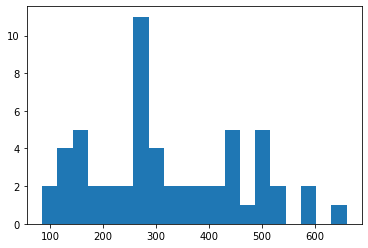

In [33]:
df1['BillAmount'].hist(bins=20,grid=False)

In [34]:
#max Bill Amount
df1['BillAmount'].max()

660.0

In [35]:
# Unique values in "Items"

df1['Items'].unique()

array(['PANEER;ROTI', 'DAL;CHICKEN;ROTI', 'MIXVEG;RICE',
       'CHICKEN;BIRYANI', 'DAL;ROTI'], dtype=object)

1.3. Order type - veg / nonveg / mix from Items

In [36]:
Order_df = df1['Items'].str.get_dummies(';')
Order_df.head(5)

,BIRYANI,CHICKEN,DAL,MIXVEG,PANEER,RICE,ROTI
index,,,,,,,
0,0,0,0,0,1,0,1
1,0,1,1,0,0,0,1
2,0,0,0,1,0,1,0
3,1,1,0,0,0,0,0
4,0,0,1,0,0,0,1


In [37]:
# Add the "Items Dummy variables" columns to the main dataframe

df1 = pd.concat((df1, Order_df), axis=1)
df1.head(2)

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Rating,ReqDeliveryTime-m,BillAmount,BIRYANI,CHICKEN,DAL,MIXVEG,PANEER,RICE,ROTI
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,2020-07-01 20:38:00,3.0,Delivered,300.0,PRO,2020-07-01 21:38:00,50.0,0.0,...,2.0,60.0,285.0,0,0,0,0,1,0,1
1,2.0,0.0,2020-07-01 08:38:00,3.0,Delivered,100.0,BF,2020-07-01 08:58:00,0.0,0.0,...,4.0,20.0,140.0,0,1,1,0,0,0,1


In [38]:
# Create a new column Order Type "VEG"/ "NON-VEG" AND "MIX" based on the dummy variables created from the column "Items"

conditions = [
    (df1['CHICKEN'] == 1) & (df1['BIRYANI'] == 1),
    (df1['CHICKEN'] == 1) & (df1['DAL'] == 1) & (df1['ROTI'] == 1),
    (df1['PANEER'] == 1) & (df1['ROTI'] == 1),
    (df1['MIXVEG'] == 1) & (df1['RICE'] == 1),
    (df1['DAL'] == 1) & (df1['ROTI'] == 1),
    (df1['CHICKEN'] == 1) & (df1['DAL'] == 0) & (df1['ROTI'] == 0) & (df1['RICE'] == 0) & (df1['MIXVEG'] == 0) & (df1['PANEER'] == 0)]
choices = ['MIX', 'MIX', 'VEG', 'VEG', 'VEG', 'NON-VEG']
df1['Order Type'] = np.select(conditions, choices, default='UNDEFINED')
df1.head(5)

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,ReqDeliveryTime-m,BillAmount,BIRYANI,CHICKEN,DAL,MIXVEG,PANEER,RICE,ROTI,Order Type
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,2020-07-01 20:38:00,3.0,Delivered,300.0,PRO,2020-07-01 21:38:00,50.0,0.0,...,60.0,285.0,0,0,0,0,1,0,1,VEG
1,2.0,0.0,2020-07-01 08:38:00,3.0,Delivered,100.0,BF,2020-07-01 08:58:00,0.0,0.0,...,20.0,140.0,0,1,1,0,0,0,1,MIX
2,3.0,0.0,2020-07-01 21:00:00,6.0,Cancelled,250.0,PRO,2020-07-01 21:30:00,25.0,0.0,...,30.0,280.0,0,0,0,1,0,1,0,VEG
3,4.0,0.0,2020-07-01 19:30:00,4.0,Delivered,550.0,PRO,2020-07-01 21:05:00,0.0,0.0,...,95.0,600.0,1,1,0,0,0,0,0,MIX
4,423.0,0.0,2020-07-01 19:38:00,3.0,Cancelled,125.0,PRO,2020-07-01 20:38:00,0.0,0.0,...,60.0,160.0,0,0,1,0,0,0,1,VEG


In [39]:
# Drop Dummy Variables for "Items"

df1 = df1.drop(['CHICKEN', 'BIRYANI', 'DAL', 'ROTI', 'RICE', 'PANEER', 'MIXVEG'], axis=1)
df1.head()

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,ST,Tip,PureVeg,Items,Membership,Type,Rating,ReqDeliveryTime-m,BillAmount,Order Type
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,2020-07-01 20:38:00,3.0,Delivered,300.0,PRO,2020-07-01 21:38:00,50.0,0.0,...,5.0,0.0,Y,PANEER;ROTI,BING,VEG,2.0,60.0,285.0,VEG
1,2.0,0.0,2020-07-01 08:38:00,3.0,Delivered,100.0,BF,2020-07-01 08:58:00,0.0,0.0,...,5.0,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0,20.0,140.0,MIX
2,3.0,0.0,2020-07-01 21:00:00,6.0,Cancelled,250.0,PRO,2020-07-01 21:30:00,25.0,0.0,...,5.0,5.0,Y,MIXVEG;RICE,BING,VEG,0.0,30.0,280.0,VEG
3,4.0,0.0,2020-07-01 19:30:00,4.0,Delivered,550.0,PRO,2020-07-01 21:05:00,0.0,0.0,...,5.0,0.0,N,CHICKEN;BIRYANI,NO,MIX,1.0,95.0,600.0,MIX
4,423.0,0.0,2020-07-01 19:38:00,3.0,Cancelled,125.0,PRO,2020-07-01 20:38:00,0.0,0.0,...,5.0,0.0,Y,DAL;ROTI,NO,VEG,1.0,60.0,160.0,VEG


2.1. Convert Status to Binary

In [40]:
#Unique values in "Status"

df1['Status'].unique()

array(['Delivered', 'Cancelled'], dtype=object)

In [41]:
# Converting the categorical values in Status to Binary

df_Status = df1['Status'].str.get_dummies(';')
df_Status.head()

,Cancelled,Delivered
index,,
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0


In [42]:
# Add the "Cancelled" and "Delivered" columns to the main dataframe and remove "Status" column

df1 = pd.concat((df1, df_Status), axis=1)
df1 = df1.drop(['Status'], axis=1)

# We want Cancelled =0 and Delivered =1 So we drop Cancelled column here

df1 = df1.drop(['Cancelled'], axis=1)

# Rename the Delivered Column
df1 = df1.rename(columns={"Delivered": "Status"})    # where 1 = Delivered and 0 = cancelled
df1.head()

,ID,Provider,DateTime,Distance,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,...,Tip,PureVeg,Items,Membership,Type,Rating,ReqDeliveryTime-m,BillAmount,Order Type,Status
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,2020-07-01 20:38:00,3.0,300.0,PRO,2020-07-01 21:38:00,50.0,0.0,COD,...,0.0,Y,PANEER;ROTI,BING,VEG,2.0,60.0,285.0,VEG,1
1,2.0,0.0,2020-07-01 08:38:00,3.0,100.0,BF,2020-07-01 08:58:00,0.0,0.0,WALLET,...,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0,20.0,140.0,MIX,1
2,3.0,0.0,2020-07-01 21:00:00,6.0,250.0,PRO,2020-07-01 21:30:00,25.0,0.0,CARD,...,5.0,Y,MIXVEG;RICE,BING,VEG,0.0,30.0,280.0,VEG,0
3,4.0,0.0,2020-07-01 19:30:00,4.0,550.0,PRO,2020-07-01 21:05:00,0.0,0.0,COD,...,0.0,N,CHICKEN;BIRYANI,NO,MIX,1.0,95.0,600.0,MIX,1
4,423.0,0.0,2020-07-01 19:38:00,3.0,125.0,PRO,2020-07-01 20:38:00,0.0,0.0,COD,...,0.0,Y,DAL;ROTI,NO,VEG,1.0,60.0,160.0,VEG,0


Observation: Status column has been converted from categorical to Binary

2.2. CONVERTING ORDER TYPE TO BINARY

In [43]:
#Unique values in "Order Type"

df1['Order Type'].unique()

array(['VEG', 'MIX'], dtype=object)

In [44]:
# Converting the categorical values in Order Type to Binary

df1_Order = df1['Order Type'].str.get_dummies(';')
df1_Order.head()

,MIX,VEG
index,,
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [45]:
# Add the "MIX" and "VEG" columns to the main dataframe and remove "Status" column

df1 = pd.concat((df1, df1_Order), axis=1)
df1 = df1.drop(['Order Type'], axis=1)

# We want MIX =0 and VEG =1 So we drop MIX column here

df1 = df1.drop(['MIX'], axis=1)

# Rename the VEG Column
df1 = df1.rename(columns={"VEG": 'Order Type_VEG'})    # where 1 = VEG and 0 = MIX
df1.head()

,ID,Provider,DateTime,Distance,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,...,Tip,PureVeg,Items,Membership,Type,Rating,ReqDeliveryTime-m,BillAmount,Status,Order Type_VEG
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,2020-07-01 20:38:00,3.0,300.0,PRO,2020-07-01 21:38:00,50.0,0.0,COD,...,0.0,Y,PANEER;ROTI,BING,VEG,2.0,60.0,285.0,1,1
1,2.0,0.0,2020-07-01 08:38:00,3.0,100.0,BF,2020-07-01 08:58:00,0.0,0.0,WALLET,...,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0,20.0,140.0,1,0
2,3.0,0.0,2020-07-01 21:00:00,6.0,250.0,PRO,2020-07-01 21:30:00,25.0,0.0,CARD,...,5.0,Y,MIXVEG;RICE,BING,VEG,0.0,30.0,280.0,0,1
3,4.0,0.0,2020-07-01 19:30:00,4.0,550.0,PRO,2020-07-01 21:05:00,0.0,0.0,COD,...,0.0,N,CHICKEN;BIRYANI,NO,MIX,1.0,95.0,600.0,1,0
4,423.0,0.0,2020-07-01 19:38:00,3.0,125.0,PRO,2020-07-01 20:38:00,0.0,0.0,COD,...,0.0,Y,DAL;ROTI,NO,VEG,1.0,60.0,160.0,0,1


3. CREATE DUMMY VARIABLES

3.1. PromoCode

In [46]:
df1['PromoCode'].unique()

array(['PRO', 'BF', 'NO'], dtype=object)

In [47]:
#Create Dummy Variable for Promocode

df_Promo = df1['PromoCode'].str.get_dummies(';').add_prefix('PromoCode_')

# Add the Dummy variable columns to the main dataframe 

df1 = pd.concat((df1, df_Promo), axis=1)

df1.head(3)

,ID,Provider,DateTime,Distance,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,...,Membership,Type,Rating,ReqDeliveryTime-m,BillAmount,Status,Order Type_VEG,PromoCode_BF,PromoCode_NO,PromoCode_PRO
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,2020-07-01 20:38:00,3.0,300.0,PRO,2020-07-01 21:38:00,50.0,0.0,COD,...,BING,VEG,2.0,60.0,285.0,1,1,0,0,1
1,2.0,0.0,2020-07-01 08:38:00,3.0,100.0,BF,2020-07-01 08:58:00,0.0,0.0,WALLET,...,BONG,MIX,4.0,20.0,140.0,1,0,1,0,0
2,3.0,0.0,2020-07-01 21:00:00,6.0,250.0,PRO,2020-07-01 21:30:00,25.0,0.0,CARD,...,BING,VEG,0.0,30.0,280.0,0,1,0,0,1


3.2 Payment Mode

In [48]:
df1['Payment mode'].unique()

array(['COD', 'WALLET', 'CARD'], dtype=object)

In [49]:
#Create Dummy Variable for Payment Mode

df_Pay = df1['Payment mode'].str.get_dummies(';').add_prefix('Paymode_')

# Add the Dummy variable columns to the main dataframe 

df1 = pd.concat((df1, df_Pay), axis=1)

df1.head(3)

,ID,Provider,DateTime,Distance,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,...,ReqDeliveryTime-m,BillAmount,Status,Order Type_VEG,PromoCode_BF,PromoCode_NO,PromoCode_PRO,Paymode_CARD,Paymode_COD,Paymode_WALLET
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,2020-07-01 20:38:00,3.0,300.0,PRO,2020-07-01 21:38:00,50.0,0.0,COD,...,60.0,285.0,1,1,0,0,1,0,1,0
1,2.0,0.0,2020-07-01 08:38:00,3.0,100.0,BF,2020-07-01 08:58:00,0.0,0.0,WALLET,...,20.0,140.0,1,0,1,0,0,0,0,1
2,3.0,0.0,2020-07-01 21:00:00,6.0,250.0,PRO,2020-07-01 21:30:00,25.0,0.0,CARD,...,30.0,280.0,0,1,0,0,1,1,0,0


3.3. Membership

In [50]:
df1['Membership'].unique()

array(['BING', 'BONG', 'NO'], dtype=object)

In [51]:
#Create Dummy Variable for Membership

df_Mem = df1['Membership'].str.get_dummies(';').add_prefix('Membership_')

# Add the Dummy variable columns to the main dataframe 

df1 = pd.concat((df1, df_Mem), axis=1)

df1.head(3)

,ID,Provider,DateTime,Distance,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,...,Order Type_VEG,PromoCode_BF,PromoCode_NO,PromoCode_PRO,Paymode_CARD,Paymode_COD,Paymode_WALLET,Membership_BING,Membership_BONG,Membership_NO
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,2020-07-01 20:38:00,3.0,300.0,PRO,2020-07-01 21:38:00,50.0,0.0,COD,...,1,0,0,1,0,1,0,1,0,0
1,2.0,0.0,2020-07-01 08:38:00,3.0,100.0,BF,2020-07-01 08:58:00,0.0,0.0,WALLET,...,0,1,0,0,0,0,1,0,1,0
2,3.0,0.0,2020-07-01 21:00:00,6.0,250.0,PRO,2020-07-01 21:30:00,25.0,0.0,CARD,...,1,0,0,1,1,0,0,1,0,0


4. NORMALIZATION OF NUMERIC FEATURES

In [52]:
# Identify Numeric columns:

#Num_IP = df1[['Distance', 'Cost', 'Discount', 'Paid amount','Delivery charges', 'Surge charges', 'Packaging charges', 'ST', 'Tip', 'BillAmount']]

#Num_OP = df1[['Rating']]

<AxesSubplot:xlabel='index'>

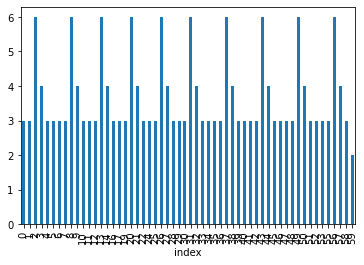

In [53]:
# 1. Distance
df1['Distance'].plot(kind = 'bar')

In [54]:
# Normalizing values for Distance

df1 = df1.copy()
  
# apply normalization techniques on Distance
column = 'Distance'
df1[column] = df1[column] /df1[column].abs().max()
  
# view normalized data
df1.head(2)

,ID,Provider,DateTime,Distance,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,...,Order Type_VEG,PromoCode_BF,PromoCode_NO,PromoCode_PRO,Paymode_CARD,Paymode_COD,Paymode_WALLET,Membership_BING,Membership_BONG,Membership_NO
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,2020-07-01 20:38:00,0.5,300.0,PRO,2020-07-01 21:38:00,50.0,0.0,COD,...,1,0,0,1,0,1,0,1,0,0
1,2.0,0.0,2020-07-01 08:38:00,0.5,100.0,BF,2020-07-01 08:58:00,0.0,0.0,WALLET,...,0,1,0,0,0,0,1,0,1,0


<AxesSubplot:xlabel='index'>

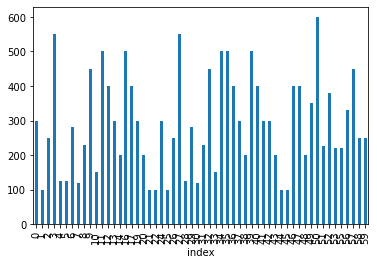

In [55]:
# 2. Cost
df1['Cost'].plot(kind = 'bar')

In [56]:
# Normalizing values for Cost

df1 = df1.copy()
  
# apply normalization techniques on Cost
column = 'Cost'
df1[column] = df1[column] /df1[column].abs().max()
  
# view normalized data
df1.head(2)

,ID,Provider,DateTime,Distance,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,...,Order Type_VEG,PromoCode_BF,PromoCode_NO,PromoCode_PRO,Paymode_CARD,Paymode_COD,Paymode_WALLET,Membership_BING,Membership_BONG,Membership_NO
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,2020-07-01 20:38:00,0.5,0.500000,PRO,2020-07-01 21:38:00,50.0,0.0,COD,...,1,0,0,1,0,1,0,1,0,0
1,2.0,0.0,2020-07-01 08:38:00,0.5,0.166667,BF,2020-07-01 08:58:00,0.0,0.0,WALLET,...,0,1,0,0,0,0,1,0,1,0


<AxesSubplot:xlabel='index'>

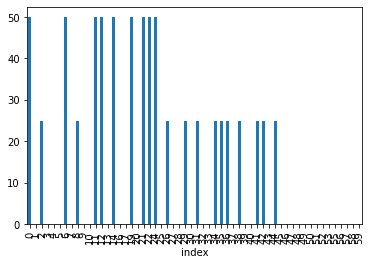

In [57]:
# 3. Discount
df1['Discount'].plot(kind = 'bar')

In [58]:
# Normalizing values for Discount

df1 = df1.copy()
  
# apply normalization techniques on Discount
column = 'Discount'
df1[column] = df1[column] /df1[column].abs().max()
  
# view normalized data
df1.head(2)

,ID,Provider,DateTime,Distance,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,...,Order Type_VEG,PromoCode_BF,PromoCode_NO,PromoCode_PRO,Paymode_CARD,Paymode_COD,Paymode_WALLET,Membership_BING,Membership_BONG,Membership_NO
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,2020-07-01 20:38:00,0.5,0.500000,PRO,2020-07-01 21:38:00,1.0,0.0,COD,...,1,0,0,1,0,1,0,1,0,0
1,2.0,0.0,2020-07-01 08:38:00,0.5,0.166667,BF,2020-07-01 08:58:00,0.0,0.0,WALLET,...,0,1,0,0,0,0,1,0,1,0


<AxesSubplot:xlabel='index'>

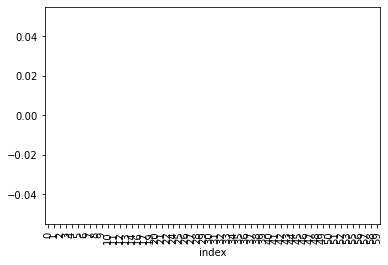

In [59]:
# 4. Paid amount
df1['Paid amount'].plot(kind = 'bar')

Paid Amount column is null

<AxesSubplot:xlabel='index'>

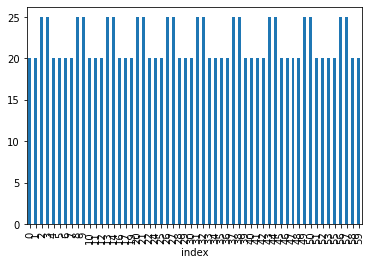

In [60]:
# 5. Delivery charges
df1['Delivery charges'].plot(kind = 'bar')

In [61]:
# Normalizing values for Delivery charges

df1 = df1.copy()
  
# apply normalization techniques on Delivery charges
column = 'Delivery charges'
df1[column] = df1[column] /df1[column].abs().max()
  
# view normalized data
df1.head(2)

,ID,Provider,DateTime,Distance,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,...,Order Type_VEG,PromoCode_BF,PromoCode_NO,PromoCode_PRO,Paymode_CARD,Paymode_COD,Paymode_WALLET,Membership_BING,Membership_BONG,Membership_NO
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,2020-07-01 20:38:00,0.5,0.500000,PRO,2020-07-01 21:38:00,1.0,0.0,COD,...,1,0,0,1,0,1,0,1,0,0
1,2.0,0.0,2020-07-01 08:38:00,0.5,0.166667,BF,2020-07-01 08:58:00,0.0,0.0,WALLET,...,0,1,0,0,0,0,1,0,1,0


<AxesSubplot:xlabel='index'>

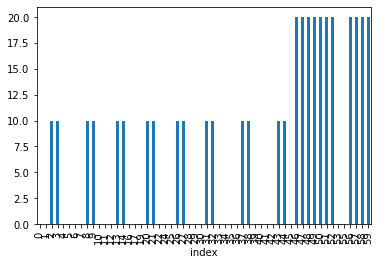

In [62]:
# 6. Surge charges
df1['Surge charges'].plot(kind = 'bar')

In [63]:
# Normalizing values for Surge charges

df1 = df1.copy()
  
# apply normalization techniques on Surge charges
column = 'Surge charges'
df1[column] = df1[column] /df1[column].abs().max()
  
# view normalized data
df1.head(2)

,ID,Provider,DateTime,Distance,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,...,Order Type_VEG,PromoCode_BF,PromoCode_NO,PromoCode_PRO,Paymode_CARD,Paymode_COD,Paymode_WALLET,Membership_BING,Membership_BONG,Membership_NO
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,2020-07-01 20:38:00,0.5,0.500000,PRO,2020-07-01 21:38:00,1.0,0.0,COD,...,1,0,0,1,0,1,0,1,0,0
1,2.0,0.0,2020-07-01 08:38:00,0.5,0.166667,BF,2020-07-01 08:58:00,0.0,0.0,WALLET,...,0,1,0,0,0,0,1,0,1,0


<AxesSubplot:xlabel='index'>

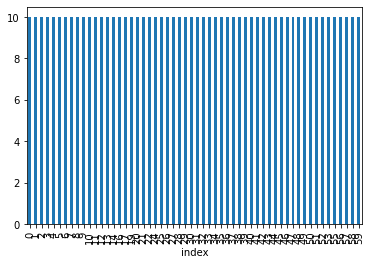

In [64]:
# 7. Packaging charges
df1['Packaging charges'].plot(kind = 'bar')

In [65]:
# Normalizing values for Packaging charges

df1 = df1.copy()
  
# apply normalization techniques on Packaging charges
column = 'Packaging charges'
df1[column] = df1[column] /df1[column].abs().max()
  
# view normalized data
df1.head(2)

,ID,Provider,DateTime,Distance,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,...,Order Type_VEG,PromoCode_BF,PromoCode_NO,PromoCode_PRO,Paymode_CARD,Paymode_COD,Paymode_WALLET,Membership_BING,Membership_BONG,Membership_NO
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,2020-07-01 20:38:00,0.5,0.500000,PRO,2020-07-01 21:38:00,1.0,0.0,COD,...,1,0,0,1,0,1,0,1,0,0
1,2.0,0.0,2020-07-01 08:38:00,0.5,0.166667,BF,2020-07-01 08:58:00,0.0,0.0,WALLET,...,0,1,0,0,0,0,1,0,1,0


<AxesSubplot:xlabel='index'>

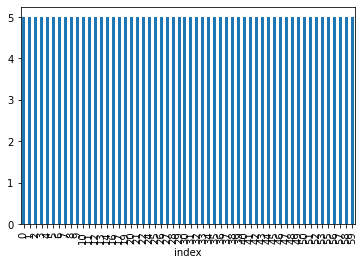

In [66]:
# 8. ST
df1['ST'].plot(kind = 'bar')

In [67]:
# Normalizing values for ST

df1 = df1.copy()
  
# apply normalization techniques on ST
column = 'ST'
df1[column] = df1[column] /df1[column].abs().max()
  
# view normalized data
df1.head(2)

,ID,Provider,DateTime,Distance,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,...,Order Type_VEG,PromoCode_BF,PromoCode_NO,PromoCode_PRO,Paymode_CARD,Paymode_COD,Paymode_WALLET,Membership_BING,Membership_BONG,Membership_NO
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,2020-07-01 20:38:00,0.5,0.500000,PRO,2020-07-01 21:38:00,1.0,0.0,COD,...,1,0,0,1,0,1,0,1,0,0
1,2.0,0.0,2020-07-01 08:38:00,0.5,0.166667,BF,2020-07-01 08:58:00,0.0,0.0,WALLET,...,0,1,0,0,0,0,1,0,1,0


<AxesSubplot:xlabel='index'>

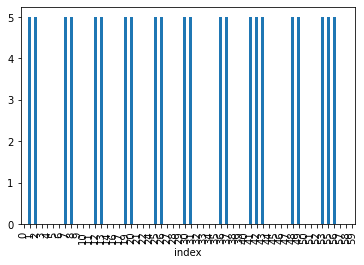

In [68]:
# 9. Tip
df1['Tip'].plot(kind = 'bar')

In [69]:
# Normalizing values for Tip

df1 = df1.copy()
  
# apply normalization techniques on Tip
column = 'Tip'
df1[column] = df1[column] /df1[column].abs().max()
  
# view normalized data
df1.head(2)

,ID,Provider,DateTime,Distance,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,...,Order Type_VEG,PromoCode_BF,PromoCode_NO,PromoCode_PRO,Paymode_CARD,Paymode_COD,Paymode_WALLET,Membership_BING,Membership_BONG,Membership_NO
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,2020-07-01 20:38:00,0.5,0.500000,PRO,2020-07-01 21:38:00,1.0,0.0,COD,...,1,0,0,1,0,1,0,1,0,0
1,2.0,0.0,2020-07-01 08:38:00,0.5,0.166667,BF,2020-07-01 08:58:00,0.0,0.0,WALLET,...,0,1,0,0,0,0,1,0,1,0


<AxesSubplot:xlabel='index'>

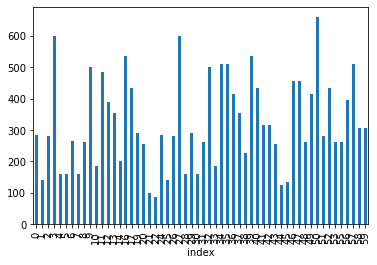

In [70]:
# 10. BillAmount
df1['BillAmount'].plot(kind = 'bar')

In [71]:
# Normalizing values for BillAmount

df1 = df1.copy()
  
# apply normalization techniques on BillAmount
column = 'BillAmount'
df1[column] = df1[column] /df1[column].abs().max()
  
# view normalized data
df1.head(2)

,ID,Provider,DateTime,Distance,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,...,Order Type_VEG,PromoCode_BF,PromoCode_NO,PromoCode_PRO,Paymode_CARD,Paymode_COD,Paymode_WALLET,Membership_BING,Membership_BONG,Membership_NO
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,2020-07-01 20:38:00,0.5,0.500000,PRO,2020-07-01 21:38:00,1.0,0.0,COD,...,1,0,0,1,0,1,0,1,0,0
1,2.0,0.0,2020-07-01 08:38:00,0.5,0.166667,BF,2020-07-01 08:58:00,0.0,0.0,WALLET,...,0,1,0,0,0,0,1,0,1,0


<AxesSubplot:xlabel='index'>

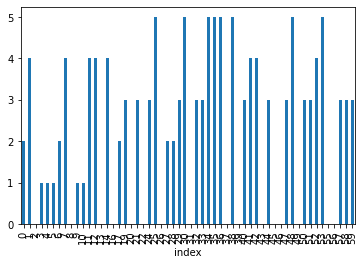

In [72]:
# Scaling the Target Variable:

#11.Rating

df1['Rating'].plot(kind = 'bar')

In [73]:
# Normalizing values for Rating

df1 = df1.copy()
  
# apply normalization techniques on Rating
column = 'Rating'
df1[column] = df1[column] /df1[column].abs().max()
  
# view normalized data
df1.head(2)

,ID,Provider,DateTime,Distance,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,...,Order Type_VEG,PromoCode_BF,PromoCode_NO,PromoCode_PRO,Paymode_CARD,Paymode_COD,Paymode_WALLET,Membership_BING,Membership_BONG,Membership_NO
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,2020-07-01 20:38:00,0.5,0.500000,PRO,2020-07-01 21:38:00,1.0,0.0,COD,...,1,0,0,1,0,1,0,1,0,0
1,2.0,0.0,2020-07-01 08:38:00,0.5,0.166667,BF,2020-07-01 08:58:00,0.0,0.0,WALLET,...,0,1,0,0,0,0,1,0,1,0


In [74]:
#Numeric Variables normalised above

#Input features:
Num_IP = df1[['Distance', 'Cost', 'Discount', 'Paid amount','Delivery charges', 'Surge charges', 'Packaging charges', 'ST', 'Tip', 'BillAmount']]

#Output features:
Num_OP = df1[['Rating']]

Validating the max and min values (i.e., range) of the numeric variables after normalization

In [75]:
# Max value of Input variables after normalization-

Num_IP.max()

Distance             1.0
Cost                 1.0
Discount             1.0
Paid amount          0.0
Delivery charges     1.0
Surge charges        1.0
Packaging charges    1.0
ST                   1.0
Tip                  1.0
BillAmount           1.0
dtype: float64

In [76]:
# Min value of Input variables after normalization-

Num_IP.min()

Distance             0.333333
Cost                 0.166667
Discount             0.000000
Paid amount          0.000000
Delivery charges     0.800000
Surge charges        0.000000
Packaging charges    1.000000
ST                   1.000000
Tip                  0.000000
BillAmount           0.128788
dtype: float64

In [77]:
# Max value of Target variable after normalization-

Num_OP.max()

Rating    1.0
dtype: float64

In [78]:
# Min value of Input variables after normalization-

Num_OP.min()

Rating    0.0
dtype: float64

Observation:
    
All the numeric values in the dataset have been normalized in the scale of -1 to +1.

5. DATA REDUCTION

In [79]:
df1.columns

Index(['ID', 'Provider', 'DateTime', 'Distance', 'Cost', 'PromoCode',
       'Delivery Time', 'Discount', 'Paid amount', 'Payment mode',
       'Delivery charges', 'Surge charges', 'Packaging charges', 'ST', 'Tip',
       'PureVeg', 'Items', 'Membership', 'Type', 'Rating', 'ReqDeliveryTime-m',
       'BillAmount', 'Status', 'Order Type_VEG', 'PromoCode_BF',
       'PromoCode_NO', 'PromoCode_PRO', 'Paymode_CARD', 'Paymode_COD',
       'Paymode_WALLET', 'Membership_BING', 'Membership_BONG',
       'Membership_NO'],
      dtype='object')

Based on the above transformation, we can conclude that the following features can be dropped-
                   
1. "Provider"      - This column is blank throughout the dataset
2. "Paid amount"   - This column is blank throughout the dataset
3. "ID"            - This is the column with sequential numbers (or Ids), hence does not provide any relevant info
4. "DateTime"      - We have already computed a new column "ReqDeliverytime" (Total Delivery Time) based on this                        column
5. "Delivery Time" - We have already computed the "ReqDeliverytime" (Total Delivery Time) based on this column
6. "PromoCode"     - We have created Dummy variables (based on values present in this column)
7. "Payment mode"  - We have created Dummy variables (based on values present in this column)
8. "Membership"    - We have created Dummy variables (based on values present in this column)
9. "Items"         - We have computed a new column "Order Type_VEG" based on values present in "Items"
10. "PureVeg"      - We have computed a new column "Order Type_VEG" with similar values
11. "Type"         - We have computed a new column "Order Type_VEG" with similar values
12. Packaging charges - We can safely drop any constant column, which doesn't add any variation in data to the DataFrame to save computational time, as that column won't affect y in any sense
13. ST             - We can safely drop any constant column, which doesn't add any variation in data to the    DataFrame to save computational time, as that column won't affect y in any sense.

In [80]:
df1 = df1.drop(['Provider', 'Paid amount', 'ID', 'DateTime', 'Delivery Time', 'PureVeg','PromoCode', 'Payment mode', 'Membership', 'Items', 'Type', 'Packaging charges', 'ST'], axis=1)
df1.head()

,Distance,Cost,Discount,Delivery charges,Surge charges,Tip,Rating,ReqDeliveryTime-m,BillAmount,Status,Order Type_VEG,PromoCode_BF,PromoCode_NO,PromoCode_PRO,Paymode_CARD,Paymode_COD,Paymode_WALLET,Membership_BING,Membership_BONG,Membership_NO
index,,,,,,,,,,,,,,,,,,,,
0,0.500000,0.500000,1.0,0.8,0.0,0.0,0.4,60.0,0.431818,1,1,0,0,1,0,1,0,1,0,0
1,0.500000,0.166667,0.0,0.8,0.0,1.0,0.8,20.0,0.212121,1,0,1,0,0,0,0,1,0,1,0
2,1.000000,0.416667,0.5,1.0,0.5,1.0,0.0,30.0,0.424242,0,1,0,0,1,1,0,0,1,0,0
3,0.666667,0.916667,0.0,1.0,0.5,0.0,0.2,95.0,0.909091,1,0,0,0,1,0,1,0,0,0,1
4,0.500000,0.208333,0.0,0.8,0.0,0.0,0.2,60.0,0.242424,0,1,0,0,1,0,1,0,0,0,1


In [81]:
# checking columns after dropping the columns

df1.columns

Index(['Distance', 'Cost', 'Discount', 'Delivery charges', 'Surge charges',
       'Tip', 'Rating', 'ReqDeliveryTime-m', 'BillAmount', 'Status',
       'Order Type_VEG', 'PromoCode_BF', 'PromoCode_NO', 'PromoCode_PRO',
       'Paymode_CARD', 'Paymode_COD', 'Paymode_WALLET', 'Membership_BING',
       'Membership_BONG', 'Membership_NO'],
      dtype='object')

# (C) EDA (Exploratory Data Analysis)

1. UNIVARIATE ANALYSIS OF EACH ATTRIBUTE

1.2 SCATTER PLOTS

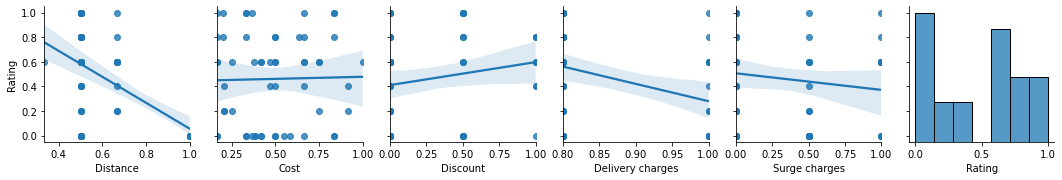

In [82]:
# Scatter plots for every input variable againts target variable "Rating" can be analysed by the below pairplot

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#Split df1 into 3 dataframes:
 
df1_1 = df1[['Distance', 'Cost', 'Discount', 'Delivery charges', 'Surge charges', 'Rating', ]]

df1_2 = df1[['Tip', 'BillAmount', 'Status', 'Rating']]

df1_3= df1[['Rating', 'ReqDeliveryTime-m', 'Order Type_VEG', 'PromoCode_BF', 'PromoCode_NO', 'PromoCode_PRO']]

df1_4= df1[['Rating', 'Paymode_CARD','Paymode_COD', 'Paymode_WALLET', 'Membership_BING', 'Membership_BONG','Membership_NO']]

s1= sns.pairplot(df1_1, kind = "reg", y_vars = "Rating")

#s= sns.pairplot(df1, y_vars = "Rating")


#s.fig.set_figheight(3)
#s.fig.set_figwidth(3)

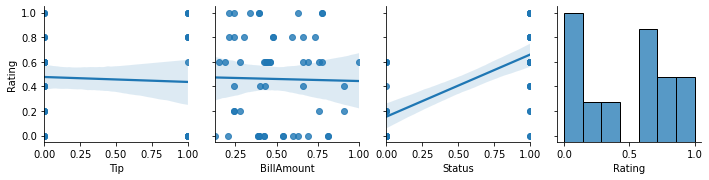

In [83]:
s2= sns.pairplot(df1_2, kind = "reg", y_vars = "Rating")

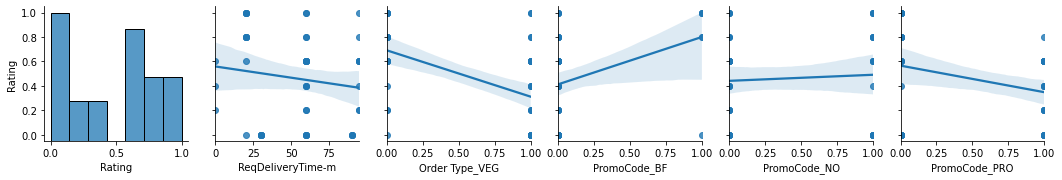

In [84]:
s3= sns.pairplot(df1_3, kind = "reg", y_vars = "Rating")

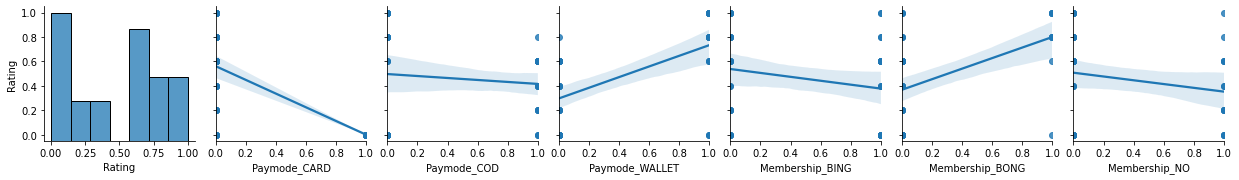

In [85]:
s4= sns.pairplot(df1_4, kind = "reg", y_vars = "Rating")

1.1 BOX PLOTS

In [86]:
df1.columns

Index(['Distance', 'Cost', 'Discount', 'Delivery charges', 'Surge charges',
       'Tip', 'Rating', 'ReqDeliveryTime-m', 'BillAmount', 'Status',
       'Order Type_VEG', 'PromoCode_BF', 'PromoCode_NO', 'PromoCode_PRO',
       'Paymode_CARD', 'Paymode_COD', 'Paymode_WALLET', 'Membership_BING',
       'Membership_BONG', 'Membership_NO'],
      dtype='object')

<AxesSubplot:xlabel='Distance'>

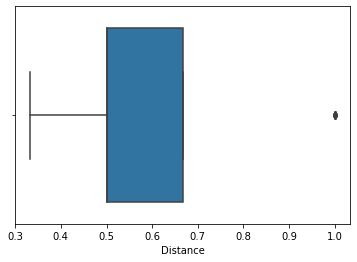

In [87]:
#Box plot for every input variable to identify outliers

#Distance
sns.boxplot(x=df1["Distance"])

Observation:
All the distances are around 2-6 (normalized to between 0 and 1). No outliers in distance

<AxesSubplot:xlabel='Discount'>

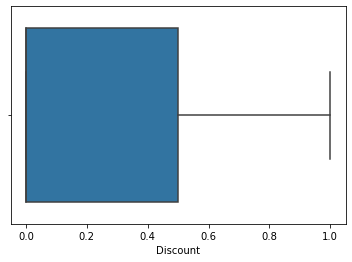

In [88]:
#Discount
sns.boxplot(x=df1["Discount"])

Observation:
No outliers in Discount

<AxesSubplot:xlabel='Cost'>

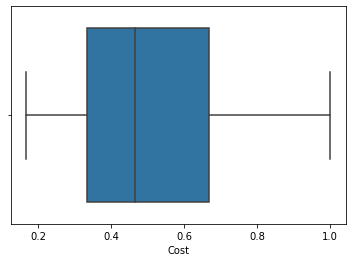

In [89]:
#Cost
sns.boxplot(x=df1["Cost"])

Observation:
No outliers in Cost

<AxesSubplot:xlabel='Delivery charges'>

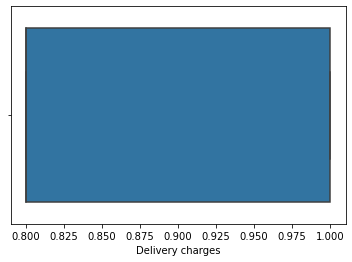

In [90]:
#Delivery charges
sns.boxplot(x=df1["Delivery charges"])

Observation:
No outliers in Delivery charges

<AxesSubplot:xlabel='Surge charges'>

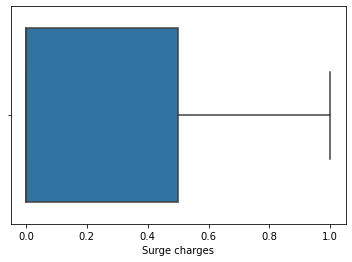

In [91]:
#Surge charges
sns.boxplot(x=df1["Surge charges"])

Observation:
No outliers in Surge charges

<AxesSubplot:xlabel='Tip'>

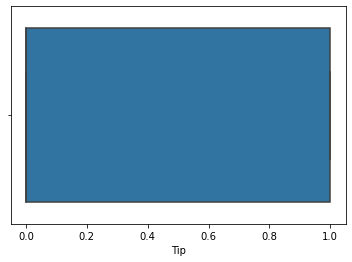

In [92]:
#Tip
sns.boxplot(x=df1["Tip"])

Observation:
No outliers in Tip

<AxesSubplot:xlabel='BillAmount'>

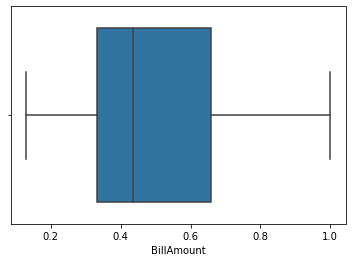

In [93]:
#Bill Amount

sns.boxplot(x=df1["BillAmount"])

Observation:
No outliers in Bill Amount

<AxesSubplot:xlabel='Rating'>

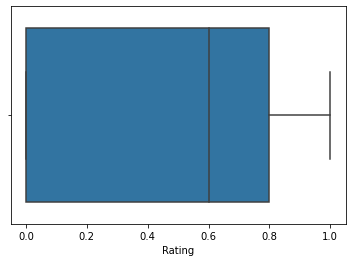

In [94]:
#Rating

sns.boxplot(x=df1["Rating"])

Observation:
No outliers in Rating

<AxesSubplot:>

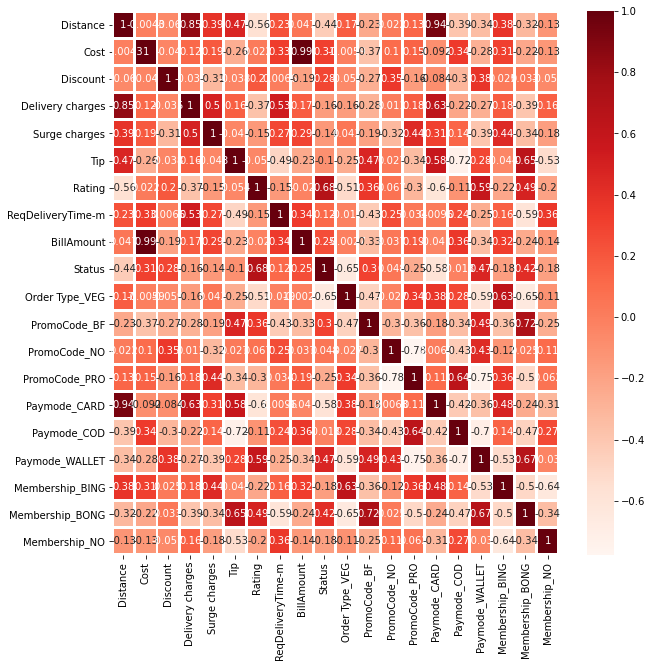

In [95]:
#Correlation

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))   
import seaborn as sns
sns.heatmap(df1.corr(),linewidths=1.9,annot=True, cmap = 'Reds')

In [96]:
'Discount', 'Delivery charges', 'Tip', 'BillAmount', 'Status','Order Type_VEG', 
'Paymode_CARD', 'Paymode_COD', 'Paymode_WALLET',
'Membership_BING', 'Membership_BONG', 'Membership_NO'

('Membership_BING', 'Membership_BONG', 'Membership_NO')

In [97]:
len(df1.corr())

20

In [98]:
# Check for highly correlated features

used = []
corrs = []
for i, j in enumerate(df1.corr().columns):
    for k in range(len(df1.corr())):
        if ((df1.corr().iloc[k, i] > 0.5) & 
            (j not in used) &
            (j != df1.corr().index[k])):
            
            used.append(j)
            corrs.append((j, df1.corr().index[k], 
                          np.round(df1.corr().iloc[k, i], 2)))

            
corrsdf = pd.DataFrame([[i[0] for i in corrs],
                        [i[1] for i in corrs],
                        [i[2] for i in corrs]])

corrsdf = corrsdf.T.rename(columns = {0:'column',1:'row',2:'corr'})
corrsdf[:15]

,column,row,corr
0,Distance,Delivery charges,0.85
1,Cost,BillAmount,0.99
2,Delivery charges,Distance,0.85
3,Tip,Paymode_CARD,0.58
4,Rating,Status,0.68
5,ReqDeliveryTime-m,Delivery charges,0.53
6,BillAmount,Cost,0.99
7,Status,Rating,0.68
8,Order Type_VEG,Membership_BING,0.63
9,PromoCode_BF,Membership_BONG,0.72


Observation:

Based on the above result:

Correlation between Predictors (Input Variables) -
    
1. Distance and Delivery Charges are highly correlated (0.85), hence we can drop any one of the feature. Dropping Distance.

2. Cost and BillAmount are highly correlated (0.99), hence we can drop any one of the feature. Dropping Cost.

3. PromoCode_BF and Membership_BONG are correlated to a good extent (0.72), hence we can drop any one of the feature. PromoCode_BF.


Correlation between Predictor and Target variable (Rating)-

1. Rating has a high correlation with "Status" of 0.68
2. Rating has a high correlation with "Payment_WALLET" of 0.59

In [99]:
# Dropping "Distance", "Cost" and "PromoCode_BF"

df1 = df1.drop(['Distance', 'Cost', 'PromoCode_BF'], axis=1)
df1.head()

,Discount,Delivery charges,Surge charges,Tip,Rating,ReqDeliveryTime-m,BillAmount,Status,Order Type_VEG,PromoCode_NO,PromoCode_PRO,Paymode_CARD,Paymode_COD,Paymode_WALLET,Membership_BING,Membership_BONG,Membership_NO
index,,,,,,,,,,,,,,,,,
0,1.0,0.8,0.0,0.0,0.4,60.0,0.431818,1,1,0,1,0,1,0,1,0,0
1,0.0,0.8,0.0,1.0,0.8,20.0,0.212121,1,0,0,0,0,0,1,0,1,0
2,0.5,1.0,0.5,1.0,0.0,30.0,0.424242,0,1,0,1,1,0,0,1,0,0
3,0.0,1.0,0.5,0.0,0.2,95.0,0.909091,1,0,0,1,0,1,0,0,0,1
4,0.0,0.8,0.0,0.0,0.2,60.0,0.242424,0,1,0,1,0,1,0,0,0,1


# (D) FEATURE SELECTION 

In [100]:
df1 = df1.astype(float)

In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 59
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Discount           56 non-null     float64
 1   Delivery charges   56 non-null     float64
 2   Surge charges      56 non-null     float64
 3   Tip                56 non-null     float64
 4   Rating             56 non-null     float64
 5   ReqDeliveryTime-m  56 non-null     float64
 6   BillAmount         56 non-null     float64
 7   Status             56 non-null     float64
 8   Order Type_VEG     56 non-null     float64
 9   PromoCode_NO       56 non-null     float64
 10  PromoCode_PRO      56 non-null     float64
 11  Paymode_CARD       56 non-null     float64
 12  Paymode_COD        56 non-null     float64
 13  Paymode_WALLET     56 non-null     float64
 14  Membership_BING    56 non-null     float64
 15  Membership_BONG    56 non-null     float64
 16  Membership_NO      56 non-nu

In [102]:
len(df1.columns)

17

In [103]:
df1.columns

Index(['Discount', 'Delivery charges', 'Surge charges', 'Tip', 'Rating',
       'ReqDeliveryTime-m', 'BillAmount', 'Status', 'Order Type_VEG',
       'PromoCode_NO', 'PromoCode_PRO', 'Paymode_CARD', 'Paymode_COD',
       'Paymode_WALLET', 'Membership_BING', 'Membership_BONG',
       'Membership_NO'],
      dtype='object')

Let us select P-value1 significance level = 0.05

# Forward stepwise feature elimination

In [104]:
#!pip install mlxtend

In [105]:
X = df1.drop(['Rating'], axis=1)
y = df1[["Rating"]]

In [106]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

forward_selection(X, y)

['Status', 'Paymode_WALLET', 'Paymode_CARD', 'Membership_NO', 'Paymode_COD']

Best Features based on Forward Selection - ['Status', 'Paymode_WALLET', 'Paymode_CARD', 'Membership_NO', 'Paymode_COD']

# Backward stepwise feature elimination



In [107]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

# Not applying the method as have applied Forward stepwise feature selection as above.

#backward_elimination(X, y)

In [108]:
X.columns

Index(['Discount', 'Delivery charges', 'Surge charges', 'Tip',
       'ReqDeliveryTime-m', 'BillAmount', 'Status', 'Order Type_VEG',
       'PromoCode_NO', 'PromoCode_PRO', 'Paymode_CARD', 'Paymode_COD',
       'Paymode_WALLET', 'Membership_BING', 'Membership_BONG',
       'Membership_NO'],
      dtype='object')

In [109]:
y.columns

Index(['Rating'], dtype='object')

Iteration - 1

In [110]:
# fit into the model

regressor_OLS = sm.OLS(endog = y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     7.939
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           1.56e-07
Time:                        13:58:49   Log-Likelihood:                 10.395
No. Observations:                  56   AIC:                             5.211
Df Residuals:                      43   BIC:                             31.54
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Discount             -0.1492      0.143     -1.040      0.304      -0.438       0.140
Delivery charges      0.2975      0.196      1.517      0.137      -0.098       0.693
Surge charges        -0.0183      0.136     -0.135      0.893      -0.292       0.255
Tip                  -0.1091      0.059     -1.843      0.072      -0.228       0.010
ReqDeliveryTime-m    -0.0012      0.002     -0.536      0.595      -0.006       0.003
BillAmount           -0.2123      0.213     -0.999      0.323      -0.641       0.216
Status                0.1306      0.161      0.811      0.422      -0.194       0.455
Order Type_VEG       -0.1765      0.167     -1.058      0.296      -0.513       0.160
PromoCode_NO          0.1494      0.181      0.825      0.414      -0.216       0.515
PromoCode_PRO         0.1916      0.234      0.819      0.417      -0.280       0.663
Paymode_CARD         -0.2662      0.077     -3.475      0.001      -0.421      -0.112
Paymode_COD           0.1401      0.127      1.105      0.275      -0.116       0.396
Paymode_WALLET        0.4730      0.109      4.347      0.000       0.254       0.692
Membership_BING       0.2843      0.155      1.831      0.074      -0.029       0.597
Membership_BONG       0.1572      0.086      1.829      0.074      -0.016       0.330
Membership_NO        -0.0946      0.100     -0.948      0.348      -0.296       0.107
==============================================================================
Omnibus:                       25.387   Durbin-Watson:                   1.485
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.519
Skew:                          -1.392   Prob(JB):                     1.07e-11
Kurtosis:                       6.728   Cond. No.                     1.22e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.41e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Observation:

Based on above results, "Surge charges" has highest P value of 0.893. 
Perform next iteration after excluding this feature.

Iteration - 2

In [111]:
X = df1.drop(['Rating', 'Surge charges'], axis=1)
y = df1[["Rating"]]

regressor_OLS = sm.OLS(endog = y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     8.857
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           5.07e-08
Time:                        13:58:49   Log-Likelihood:                 10.383
No. Observations:                  56   AIC:                             3.235
Df Residuals:                      44   BIC:                             27.54
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Discount             -0.1418      0.131     -1.081      0.286      -0.406       0.122
Delivery charges      0.2885      0.183      1.581      0.121      -0.079       0.656
Tip                  -0.1066      0.056     -1.916      0.062      -0.219       0.006
ReqDeliveryTime-m    -0.0012      0.002     -0.551      0.584      -0.006       0.003
BillAmount           -0.2125      0.210     -1.011      0.318      -0.636       0.211
Status                0.1374      0.151      0.909      0.368      -0.167       0.442
Order Type_VEG       -0.1649      0.142     -1.164      0.251      -0.450       0.121
PromoCode_NO          0.1468      0.178      0.825      0.414      -0.212       0.506
PromoCode_PRO         0.1828      0.222      0.823      0.415      -0.265       0.630
Paymode_CARD         -0.2661      0.076     -3.513      0.001      -0.419      -0.113
Paymode_COD           0.1404      0.125      1.120      0.269      -0.112       0.393
Paymode_WALLET        0.4663      0.096      4.864      0.000       0.273       0.660
Membership_BING       0.2739      0.133      2.055      0.046       0.005       0.542
Membership_BONG       0.1595      0.083      1.914      0.062      -0.008       0.327
Membership_NO        -0.0927      0.098     -0.949      0.348      -0.289       0.104
==============================================================================
Omnibus:                       25.485   Durbin-Watson:                   1.473
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.826
Skew:                          -1.397   Prob(JB):                     9.19e-12
Kurtosis:                       6.738   Cond. No.                     1.43e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Observation:

Based on above results, "ReqDeliveryTime-m" has highest P value of 0.584. 
Perform next iteration after excluding this feature.

Iteration - 3

In [112]:
X = df1.drop(['Rating', 'Surge charges', 'ReqDeliveryTime-m'], axis=1)
y = df1[["Rating"]]

regressor_OLS = sm.OLS(endog = y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     9.865
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           1.78e-08
Time:                        13:58:49   Log-Likelihood:                 10.190
No. Observations:                  56   AIC:                             1.620
Df Residuals:                      45   BIC:                             23.90
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Discount            -0.1398      0.130     -1.075      0.288      -0.402       0.122
Delivery charges     0.2206      0.134      1.651      0.106      -0.048       0.490
Tip                 -0.0968      0.052     -1.850      0.071      -0.202       0.009
BillAmount          -0.2061      0.208     -0.990      0.328      -0.626       0.213
Status               0.1220      0.147      0.827      0.412      -0.175       0.419
Order Type_VEG      -0.1281      0.124     -1.033      0.307      -0.378       0.122
PromoCode_NO         0.1440      0.177      0.815      0.419      -0.212       0.500
PromoCode_PRO        0.2188      0.211      1.039      0.304      -0.205       0.643
Paymode_CARD        -0.2895      0.062     -4.658      0.000      -0.415      -0.164
Paymode_COD          0.1138      0.115      0.991      0.327      -0.117       0.345
Paymode_WALLET       0.4672      0.095      4.911      0.000       0.276       0.659
Membership_BING      0.2301      0.106      2.167      0.036       0.016       0.444
Membership_BONG      0.1927      0.057      3.385      0.001       0.078       0.307
Membership_NO       -0.1314      0.067     -1.953      0.057      -0.267       0.004
==============================================================================
Omnibus:                       26.509   Durbin-Watson:                   1.490
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.032
Skew:                          -1.462   Prob(JB):                     3.05e-12
Kurtosis:                       6.765   Cond. No.                     4.29e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.6e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Observation:

Based on above results, "PromoCode_NO" has highest P value of 0.419. 
Perform next iteration after excluding this feature.

Iteration - 4

In [113]:

X = df1.drop(['Rating', 'Surge charges', 'ReqDeliveryTime-m', 'PromoCode_NO'], axis=1)
y = df1[["Rating"]]

regressor_OLS = sm.OLS(endog = y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     10.97
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           6.95e-09
Time:                        13:58:49   Log-Likelihood:                 9.7794
No. Observations:                  56   AIC:                            0.4411
Df Residuals:                      46   BIC:                             20.69
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Discount            -0.0740      0.102     -0.728      0.470      -0.279       0.131
Delivery charges     0.2784      0.113      2.467      0.017       0.051       0.505
Tip                 -0.0978      0.052     -1.878      0.067      -0.203       0.007
BillAmount          -0.1265      0.183     -0.690      0.493      -0.495       0.242
Status               0.0848      0.140      0.607      0.547      -0.196       0.366
Order Type_VEG      -0.1260      0.124     -1.020      0.313      -0.375       0.123
PromoCode_PRO        0.0687      0.102      0.673      0.504      -0.137       0.274
Paymode_CARD        -0.2806      0.061     -4.603      0.000      -0.403      -0.158
Paymode_COD          0.1477      0.107      1.385      0.173      -0.067       0.362
Paymode_WALLET       0.4788      0.094      5.110      0.000       0.290       0.667
Membership_BING      0.2594      0.100      2.606      0.012       0.059       0.460
Membership_BONG      0.1828      0.055      3.299      0.002       0.071       0.294
Membership_NO       -0.0963      0.052     -1.869      0.068      -0.200       0.007
==============================================================================
Omnibus:                       28.477   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.485
Skew:                          -1.515   Prob(JB):                     1.64e-14
Kurtosis:                       7.245   Cond. No.                     5.96e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.76e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Observation:

Based on above results, "Discount" has highest P value of 0.499. 
Perform next iteration after excluding this feature.

Iteration - 5

In [114]:
X = df1.drop(['Rating', 'Surge charges', 'ReqDeliveryTime-m', 'PromoCode_NO', 'PromoCode_PRO'], axis=1)
y = df1[["Rating"]]

regressor_OLS = sm.OLS(endog = y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     12.43
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           2.32e-09
Time:                        13:58:49   Log-Likelihood:                 9.5047
No. Observations:                  56   AIC:                            -1.009
Df Residuals:                      47   BIC:                             17.22
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Discount            -0.0583      0.098     -0.593      0.556      -0.256       0.140
Delivery charges     0.3145      0.099      3.186      0.003       0.116       0.513
Tip                 -0.0897      0.050     -1.781      0.081      -0.191       0.012
BillAmount          -0.1541      0.178     -0.868      0.390      -0.511       0.203
Status               0.0725      0.138      0.526      0.601      -0.204       0.349
Order Type_VEG      -0.1467      0.119     -1.233      0.224      -0.386       0.093
Paymode_CARD        -0.2759      0.060     -4.582      0.000      -0.397      -0.155
Paymode_COD          0.1964      0.078      2.521      0.015       0.040       0.353
Paymode_WALLET       0.4570      0.087      5.227      0.000       0.281       0.633
Membership_BING      0.2821      0.093      3.031      0.004       0.095       0.469
Membership_BONG      0.1861      0.055      3.392      0.001       0.076       0.297
Membership_NO       -0.0908      0.051     -1.794      0.079      -0.193       0.011
==============================================================================
Omnibus:                       25.768   Durbin-Watson:                   1.552
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.351
Skew:                          -1.391   Prob(JB):                     2.60e-12
Kurtosis:                       6.890   Cond. No.                     4.04e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.46e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Finalized features -  

'Discount', 'Delivery charges', 'Tip', 'BillAmount', 'Status','Order Type_VEG', 'Paymode_CARD', 'Paymode_COD', 'Paymode_WALLET','Membership_BING', 'Membership_BONG', 'Membership_NO'

# (E) MODEL BUILDING

Model results with best features selected via Backward Stepwise Elimination

In [115]:
X = sm.add_constant(df1[['Discount', 'Delivery charges', 'Tip', 'BillAmount', 'Status','Order Type_VEG', 'Paymode_CARD', 'Paymode_COD', 'Paymode_WALLET','Membership_BING', 'Membership_BONG', 'Membership_NO']])

y = df1["Rating"]

In [116]:
# Data into train and Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y,train_size = 0.8,random_state = 100 )

In [117]:
#fit the OLS model to training data
df_lm = sm.OLS(y_train, X_train).fit()

In [118]:
#Obtaining paramters
print( df_lm.params )

const               0.251908
Discount            0.032250
Delivery charges    0.202162
Tip                -0.147449
BillAmount         -0.222547
Status              0.045323
Order Type_VEG     -0.171648
Paymode_CARD       -0.283912
Paymode_COD         0.132689
Paymode_WALLET      0.403130
Membership_BING     0.244563
Membership_BONG     0.136463
Membership_NO      -0.129118
dtype: float64


In [119]:
#Regression Model Summary

df_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.609   
Dependent Variable: Rating           AIC:                4.1531  
Date:               2022-01-02 13:58 BIC:                20.2108 
No. Observations:   44               Log-Likelihood:     6.9235  
Df Model:           8                F-statistic:        9.355   
Df Residuals:       35               Prob (F-statistic): 8.56e-07
R-squared:          0.681            Scale:              0.053732
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
const              0.2519   0.0655  3.8440 0.0005  0.1189  0.3849
Discount           0.0323   0.1349  0.2391 0.8124 -0.2416  0.3061
Delivery charges   0.2022   0.0833  2.4262 0.0205  0.0330  0.3713
Tip               -0.1474   0.0631 -2.3368 0.0253 -0.2755 -0.0194
BillAmount        -0.2225   0.2175 -1.0234 0.3132 -0.6640  0.2189
Status             0.0453   0.1690  0.2682 0.7901 -0.2977  0.3884
Order Type_VEG    -0.1716   0.1397 -1.2285 0.2275 -0.4553  0.1120
Paymode_CARD      -0.2839   0.0743 -3.8207 0.0005 -0.4348 -0.1331
Paymode_COD        0.1327   0.0838  1.5827 0.1225 -0.0375  0.3029
Paymode_WALLET     0.4031   0.0949  4.2469 0.0002  0.2104  0.5958
Membership_BING    0.2446   0.0965  2.5352 0.0159  0.0487  0.4404
Membership_BONG    0.1365   0.0639  2.1368 0.0397  0.0068  0.2661
Membership_NO     -0.1291   0.0626 -2.0624 0.0467 -0.2562 -0.0020
-----------------------------------------------------------------
Omnibus:           20.715   Durbin-Watson:      1.521            
Prob(Omnibus):     0.000    Jarque-Bera (JB):   34.758           
Skew:              -1.343   Prob(JB):           0.000            
Kurtosis:          6.428    Condition No.:      87525987420658544
=================================================================
* The condition number is large (9e+16). This might indicate
strong multicollinearity or other numerical problems.
"""

Observation:

R-Squared = 0.68 (~0.7). This can be interpreted as the factor indicating the performance of the model, basically telling how good the model is. Ideally 0 < R2 score < 1. As 0.7 is quite close to 1, this depicts a good model. In addition, we check for Adjusted R value in Multiple regression which is 0.6. This depicts the model is close to being accurate.

In [120]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, r2_score
import math

# now generate predictions
Y_pred = df_lm.predict(X_test)

In [121]:
# creating dataframe (using pandas) for actual vs predicted values 

df_pred = pd.DataFrame()
df_pred["y_actual"]=y_test
df_pred["y_predicted"]=Y_pred
df_pred

,y_actual,y_predicted
index,,
36,1.0,0.727294
6,0.4,0.607459
56,0.0,-0.037567
52,0.8,0.517886
12,0.8,0.751849
28,0.4,0.191610
11,0.8,0.803717
20,0.0,0.009640
0,0.4,0.600715


In [122]:
#Error terms:

from sklearn.metrics import mean_squared_error

print("Error terms:")
print("")
mse=mean_squared_error(y_test, Y_pred)
print('Mean Squared Error:',mse)
print("")
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_pred)))
print("")

Error terms:

Mean Squared Error: 0.04679828153755974

Root Mean Squared Error: 0.2163291046936582



Observation:
Mean Squared Error (mse) = 
This can be interpreted as how close the predicted model is to a set of given data (training data),i.e., 0.04 is the square of distance from the actual data points to the predicted regression line/ model. The more close MSE to zero better the model.

Root Mean Squared Error (rmse) = 
This can be interpreted as the average deviation between the predicted Cost made by the model and the actual
Cost, i.e., 0.2 is the square root of the average of squared differences between the predicted Cost vs the
actual Cost.

Model results with best features selected via Foward Stepwise Elimination

In [123]:
X = sm.add_constant(df1[['Status', 'Paymode_WALLET', 'Paymode_CARD', 'Membership_NO', 'Paymode_COD']])
y = df1["Rating"]

# Data into train and Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y,train_size = 0.8,random_state = 100 )

#fit the OLS model to training data
df_lm = sm.OLS(y_train, X_train).fit()

#Obtaining paramters
print( df_lm.params )

#Regression Model Summary

df_lm.summary2()

from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, r2_score
import math

# now generate predictions
Y_pred = df_lm.predict(X_test)

# creating dataframe (using pandas) for actual vs predicted values 

df_pred = pd.DataFrame()
df_pred["y_actual"]=y_test
df_pred["y_predicted"]=Y_pred
df_pred

#Error terms:

from sklearn.metrics import mean_squared_error

print("Error terms:")
print("")
mse=mean_squared_error(y_test, Y_pred)
print('Mean Squared Error:',mse)
print("")
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_pred)))
print("")

const             0.258467
Status            0.168024
Paymode_WALLET    0.391950
Paymode_CARD     -0.258467
Membership_NO    -0.189096
Paymode_COD       0.124984
dtype: float64
Error terms:

Mean Squared Error: 0.036944188379446984

Root Mean Squared Error: 0.19220871046715596

